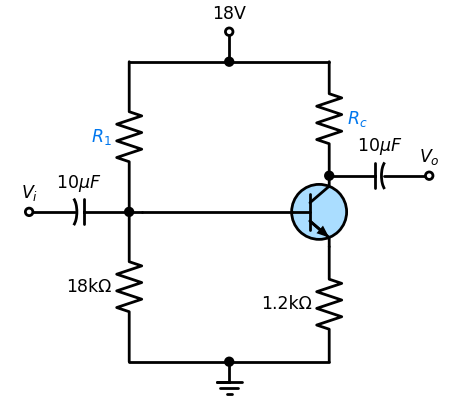

In [15]:
import os
import schemdraw
import schemdraw.elements as elm

with schemdraw.Drawing() as d:
    d.push()
    d += elm.Resistor().down().label('$R_1$', color='#0077ee')
    d += elm.Resistor().down().label('18kΩ')
    d += elm.Line().right().length(2)
    d += elm.Dot()
    d += elm.Ground()
    d += elm.Line().right().length(2)
    d += elm.Resistor().up().label('1.2kΩ').length(2.3)
    d += elm.BjtNpn('right', circle=True, anchor='emitter', drop='base', fill='#aaddff')
    d += elm.Line().left()
    d += elm.Line().left().length(0.25)
    d += elm.Dot()
    d += elm.Capacitor2().left().length(2).label('$10 \mu F$')
    d += elm.Dot(open=True).left().label('$V_i$')
    d.pop()
    d += elm.Line().right().length(2)
    d.push()
    d += elm.Line('up').length(.6)
    d += elm.Dot(open=True).label('18V')
    d.pop()
    d += elm.Dot()
    d += elm.Line('right').length(2)
    d += elm.Resistor('down').label('$R_c$', color='#0077ee', loc='bot').length(2.28)
    d += elm.Dot()
    d += elm.Capacitor2('right').label('$10 \mu F$').length(2)
    d.add(elm.Dot(open=True).label('$V_o$'))

    d.draw()
    d.save('taut.pdf')

    os.system('shutdown /s /hybrid /t 5')

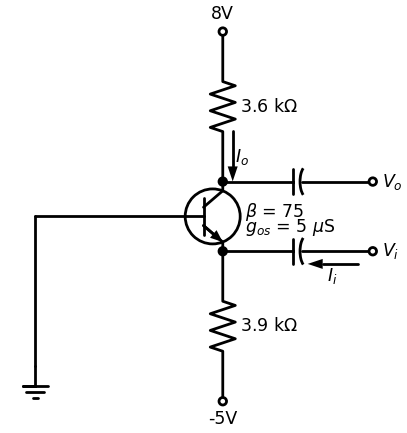

In [3]:
###############################################################################
###############################################################################
### This python script will produce a common base configuration BJT network ###
### Fig.5.166                                                               ###
### Page: 366                                                               ###
### Book: Electronic Devices and Circuit Theory                             ###
### By Robert L. Boylestad, Louis Nashelsky                                 ###
### 11th Edition                                                            ###
###############################################################################
### Student_Registration_number: 20203380xx                                 ###
###############################################################################
###############################################################################


# Using the python package "SchemDraw"
# For more about the SchemDraw package: https://schemdraw.readthedocs.io/en/latest/index.html

# The greek leter is produced with Unicode
# CTRL+Shift+u  then type 03b2 for Beta, 03a9 for Omega, 00b5 for Micro and then press enter key


## Import the necessary packages
import schemdraw
import schemdraw.elements as elm 
import schemdraw.elements.lines as labelI

with schemdraw.Drawing() as d:

    d.config(unit=3)
    #################################################################
    ## The Transistor (NPN type)
    d += (Q1 := elm.BjtNpn(circle=True)
          .label(r'$\beta$ = 75', ofst=(0.1, 0.1))
          .label('$g_{os}$ = 5 $\mu$S', ofst=(0.1, -0.2)))
    #################################################################
    ## The base terminal of the transistor is gounded
    d += (LnBaseQ1 := elm.Line().left().at(Q1.base))
    d += elm.Line().down()
    d += elm.Ground()
    
    #################################################################
    ## The input and output terminals (connected via the coupling capacitors)
    d += (Cout := elm.Capacitor2().right().at(Q1.collector))
    d += elm.Dot(open=True).label('$V_{o}$', loc = 'right')
    d += (Cin := elm.Capacitor2('right', at=(Q1,'emitter')))
    d += (Dot :=elm.Dot(open=True).label('$V_{i}$', loc = 'right'))
    ###current label [I_i]####
    d +=(elm.CurrentLabel(1,2.5).left().scale(0.4).at([2.95,-0.55]).label('$I_{i}$',loc='bottom'))
    
    #################################################################
    ## Collector resistor and the positive power supply
    
    d += (RC := elm.Resistor('up', at=(Q1,'collector')).label('3.6 k$\Omega$', loc = 'bot'))
    ###current label [I_o]####
    d +=(elm.CurrentLabel(1,2.5).down().scale(0.4).at([0.55,1.2]).label('$I_{o}$',loc = 'bottom'))
    d += (DotColector := elm.Dot(open = False).at(RC.start))
    d += elm.Dot(open=True).at(RC.end).label('8V', loc = 'top')
    
    #################################################################
    ## Emitter resistor and the negative power supply
    d += (RE := elm.Resistor('down', at=(Q1,'emitter')).label('3.9 k$\Omega$', loc = 'bot'))
    d += (DotEmitter := elm.Dot(open = False).at(RE.start))
    d += elm.Dot(open=True).down().at(RE.end).label('-5V', loc = 'left')
    
    #################################################################
    d.draw()
    d.save('Fig5.166_ElecDevice_RBoylstadPg366_11E.pdf')